In [2]:

from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


connecting colab with kaggle through the drive 

In [1]:
! mkdir ~/.kaggle

In [2]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

download the dataset and unzip it 

In [3]:
! kaggle datasets download -d adarshsng/heart-mri-image-dataset-left-atrial-segmentation


 99% 455M/459M [00:04<00:00, 139MB/s]
100% 459M/459M [00:04<00:00, 97.1MB/s]


In [5]:
! unzip heart-mri-image-dataset-left-atrial-segmentation.zip


Archive:  heart-mri-image-dataset-left-atrial-segmentation.zip
  inflating: A large annotated medical image dataset for thedevelopment and evaluation of segmentationalgorithms.pdf  
  inflating: dataset.json            
  inflating: imagesTr/._la_029.nii.gz  
  inflating: imagesTr/la_003.nii     
  inflating: imagesTr/la_004.nii     
  inflating: imagesTr/la_005.nii     
  inflating: imagesTr/la_007.nii     
  inflating: imagesTr/la_009.nii     
  inflating: imagesTr/la_010.nii     
  inflating: imagesTr/la_011.nii     
  inflating: imagesTr/la_014.nii     
  inflating: imagesTr/la_016.nii     
  inflating: imagesTr/la_017.nii     
  inflating: imagesTr/la_018.nii     
  inflating: imagesTr/la_019.nii     
  inflating: imagesTr/la_020.nii     
  inflating: imagesTr/la_021.nii     
  inflating: imagesTr/la_022.nii     
  inflating: imagesTr/la_023.nii     
  inflating: imagesTr/la_024.nii     
  inflating: imagesTr/la_026.nii     
  inflating: imagesTr/la_029.nii     
  inflating: image

In [1]:

!pip install nibabel 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


showing images and rescaling them 

In [6]:
import nibabel as nib
import pylab as plt 
import numpy as np 
import os
import random

(320, 320, 130)


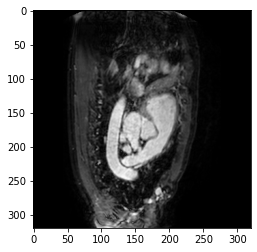

In [7]:
img1 = nib.load("/content/imagesTr/la_003.nii")
data = img1.get_fdata()
plt.imshow(data[:,:,data.shape[2]//2].T,cmap='Greys_r')
print(data.shape)

(320, 320, 110)


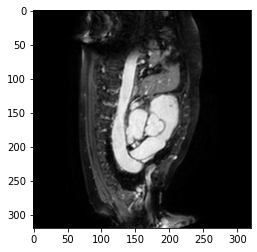

In [8]:
img2 = nib.load('/content/imagesTr/la_030.nii')
data2=img2.get_fdata()
plt.imshow(data2[:, :, data2.shape[2] // 2].T, cmap='Greys_r')
print(data2.shape)


(320, 320, 110)


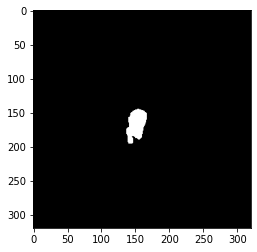

In [9]:
img2 = nib.load('/content/labelsTr/la_030.nii')
data3=img2.get_fdata()
plt.imshow(data3[:, :, data3.shape[2] // 2].T, cmap='Greys_r')
print(data3.shape)


In [11]:
#os.mkdir(os.getcwd()+'imagesTr')
#os.mkdir(os.getcwd()+'labelsTr')
imagesTr='/content/imagesTr'
for image in os.listdir(imagesTr):
    imgDir = os.path.join(imagesTr, image)
    #nib.Nifti1Header.quaternion_threshold
    try :
     img = nib.load(imgDir)
     data = img.get_fdata()
     rescaled = ((data - data.min()) * 255. / (data.max() - data.min())).astype(np.uint8)
     rescalesImg = nib.Nifti1Image(rescaled, affine=img.affine, header=img.header)
     nib.save(rescalesImg, '/content/imagesTrrs/'+image)

    except:
      print('img29')
    

img29


In [12]:
labelsTr='/content/labelsTr'
for image in os.listdir(labelsTr):
    imgDir = os.path.join(labelsTr, image)
    #nib.Nifti1Header.quaternion_threshold
    try:
     img = nib.load(imgDir)
     data = img.get_fdata()
     rescaled = ((data - data.min()) * 255. / (data.max() - data.min())).astype(np.uint8)
     rescalesImg = nib.Nifti1Image(rescaled, affine=img.affine, header=img.header)
     nib.save(rescalesImg, '/content/labelsTrrs/'+image)
    except:
      print('29')

29
29


slicing images in z direction then save the sliced umage along with its label 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


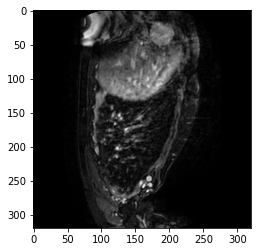

In [26]:
img3D=nib.load('/content/imagesTr/la_004.nii')
lbl3D=nib.load('/content/labelsTr/la_004.nii')
imgData=img3D.get_data()
lblData=lbl3D.get_data()
if(imgData.shape[2]==lblData.shape[2]):
  for z in range(imgData.shape[2]):
    plt.imshow(imgData[:,:,z].T, cmap='Greys_r')
    nSlice=nib.Nifti1Image(imgData[:,:,z], affine=img3D.affine, header=img3D.header)
    nib.save(nSlice,'/content/slicedImg/imgs/004.nii.gz')
    lblSlice=nib.Nifti1Image(lblData[:,:,z],affine=lbl3D.affine,header=lbl3D.header)
    nib.save(lblSlice,'/content/slicedImg/lbl')


    